In [1]:
# Code Cell 2: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Code Cell 4: Load and Prepare Data Implementation

file_path = 'Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

features_for_dt = [
    'Daily Mean PM2.5 Concentration',
    'Daily Obs Count',
    'Percent Complete',
    'Site Latitude',
    'Site Longitude'
]
target_variable = 'Daily AQI Value'

# Separate features (X) and target (y)
X = data[features_for_dt].copy()
y = data[target_variable].copy()

# Handle missing values (filling with mean for simplicity)
X = X.fillna(X.mean())
y = y.fillna(y.mean()) # Handle missing values in target as well if any

# Standardize the features (optional but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Code Cell 6: Train Decision Tree Regressor Implementation

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and train Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=0, max_depth=5) # You can adjust max_depth
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [4]:
# Code Cell 8: Evaluate Model Implementation (Optional)

y_pred = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Mean Squared Error on Test Set: 0.68


<ipython-input-5-e37380d5b4dc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


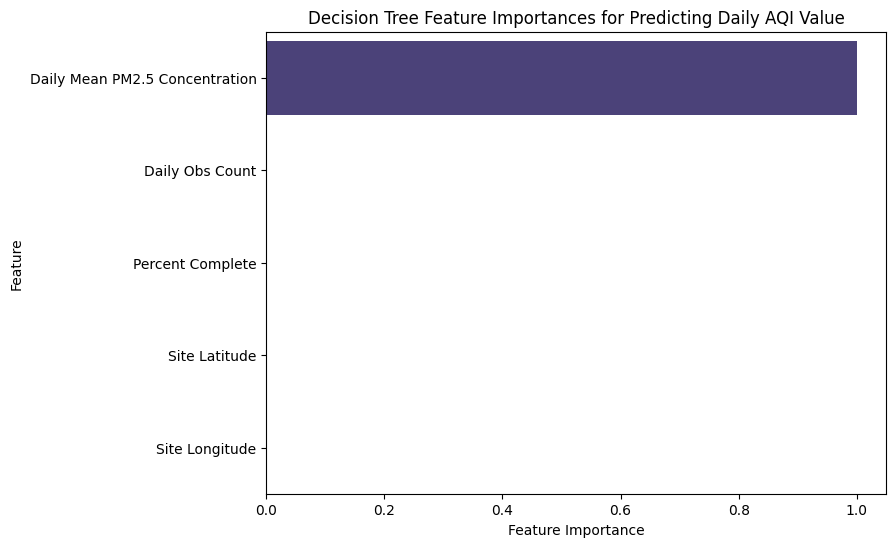

In [5]:
# Code Cell 10: Visualize Feature Importances Implementation

feature_importances = decision_tree.feature_importances_
feature_names = features_for_dt # Use original feature names for clarity

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False) # Sort by importance

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Decision Tree Feature Importances for Predicting Daily AQI Value')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

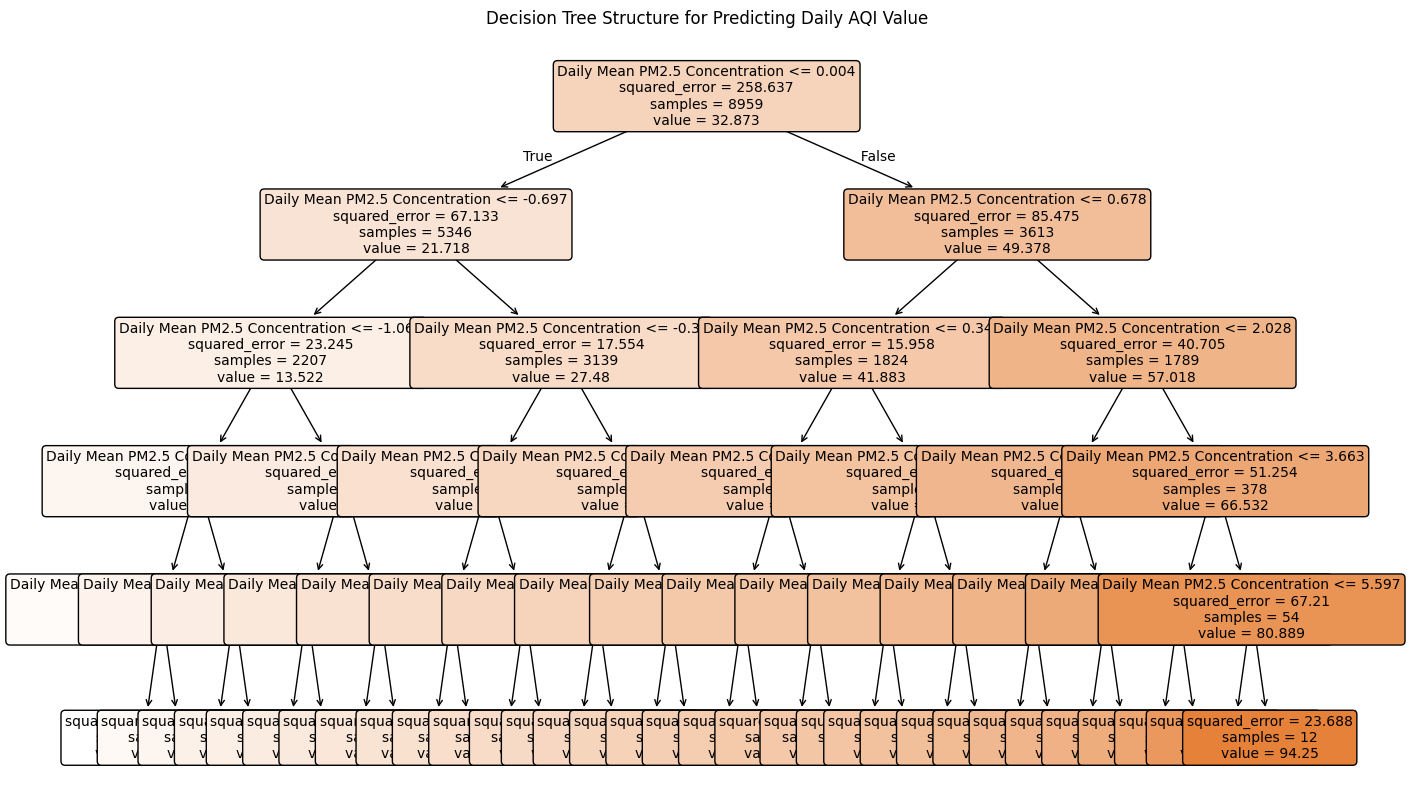

In [6]:
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
plot_tree(decision_tree,
          feature_names=features_for_dt, # Use feature names
          filled=True,      # Fill nodes with color based on impurity/value
          rounded=True,     # Rounded boxes for aesthetics
          fontsize=10)
plt.title('Decision Tree Structure for Predicting Daily AQI Value')
plt.show()